In [483]:
"""
Names: Amru Qutub & Roben Mata
ECE 407 Final Project 
Professor Ahmet Cetin
TA: Ouday Hanosh
Title: UCLA graduate school chance of admisssion predicition
Description: This program imports a CSV file with 9 columns and 400 entries. 
The dependent variable is chance of admission.
The data is analyzed using regression (linear and decision tree) and
classification (SVM and KNN)models. 

Language: Python
IDE: JuypterLab 
    
"""


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import math
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report










In [454]:
"""
Import data, adjust column title text
print column data to user 
"""

gradData = pd.read_csv("Admission_Predict.csv",sep = ",")
gradData=gradData.rename(columns = {'Chance of Admit ':'Chance of Admit'})
print("There are",len(gradData.columns),"columns & and",len(gradData), "data entries")
print("Column titles: ")
for x in gradData.columns:
    sys.stdout.write(str(x)+", ")
#print summary of data imported to user
print("The imported data file for Grad Schoold admission to UCLA has the following information:")
print(gradData.info())

There are 9 columns & and 400 data entries
Column titles: 
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit, The imported data file for Grad Schoold admission to UCLA has the following information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [424]:
#check data imported before processing
#print first 5 lines of data imported
print(gradData.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


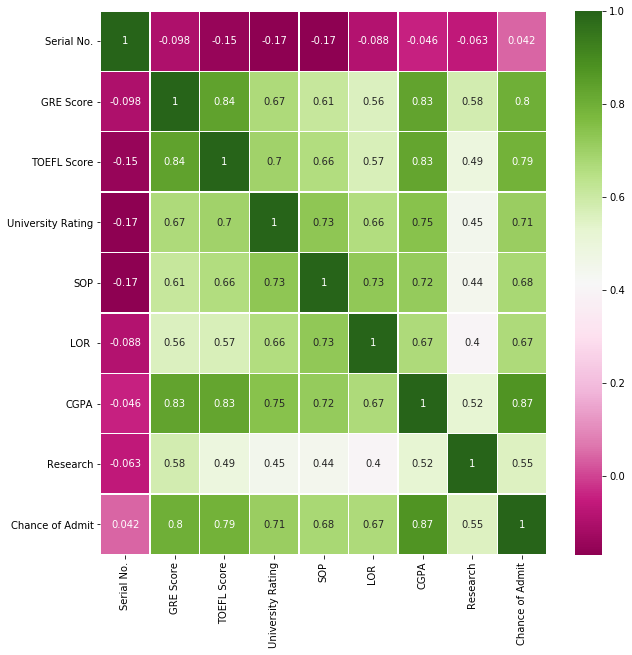

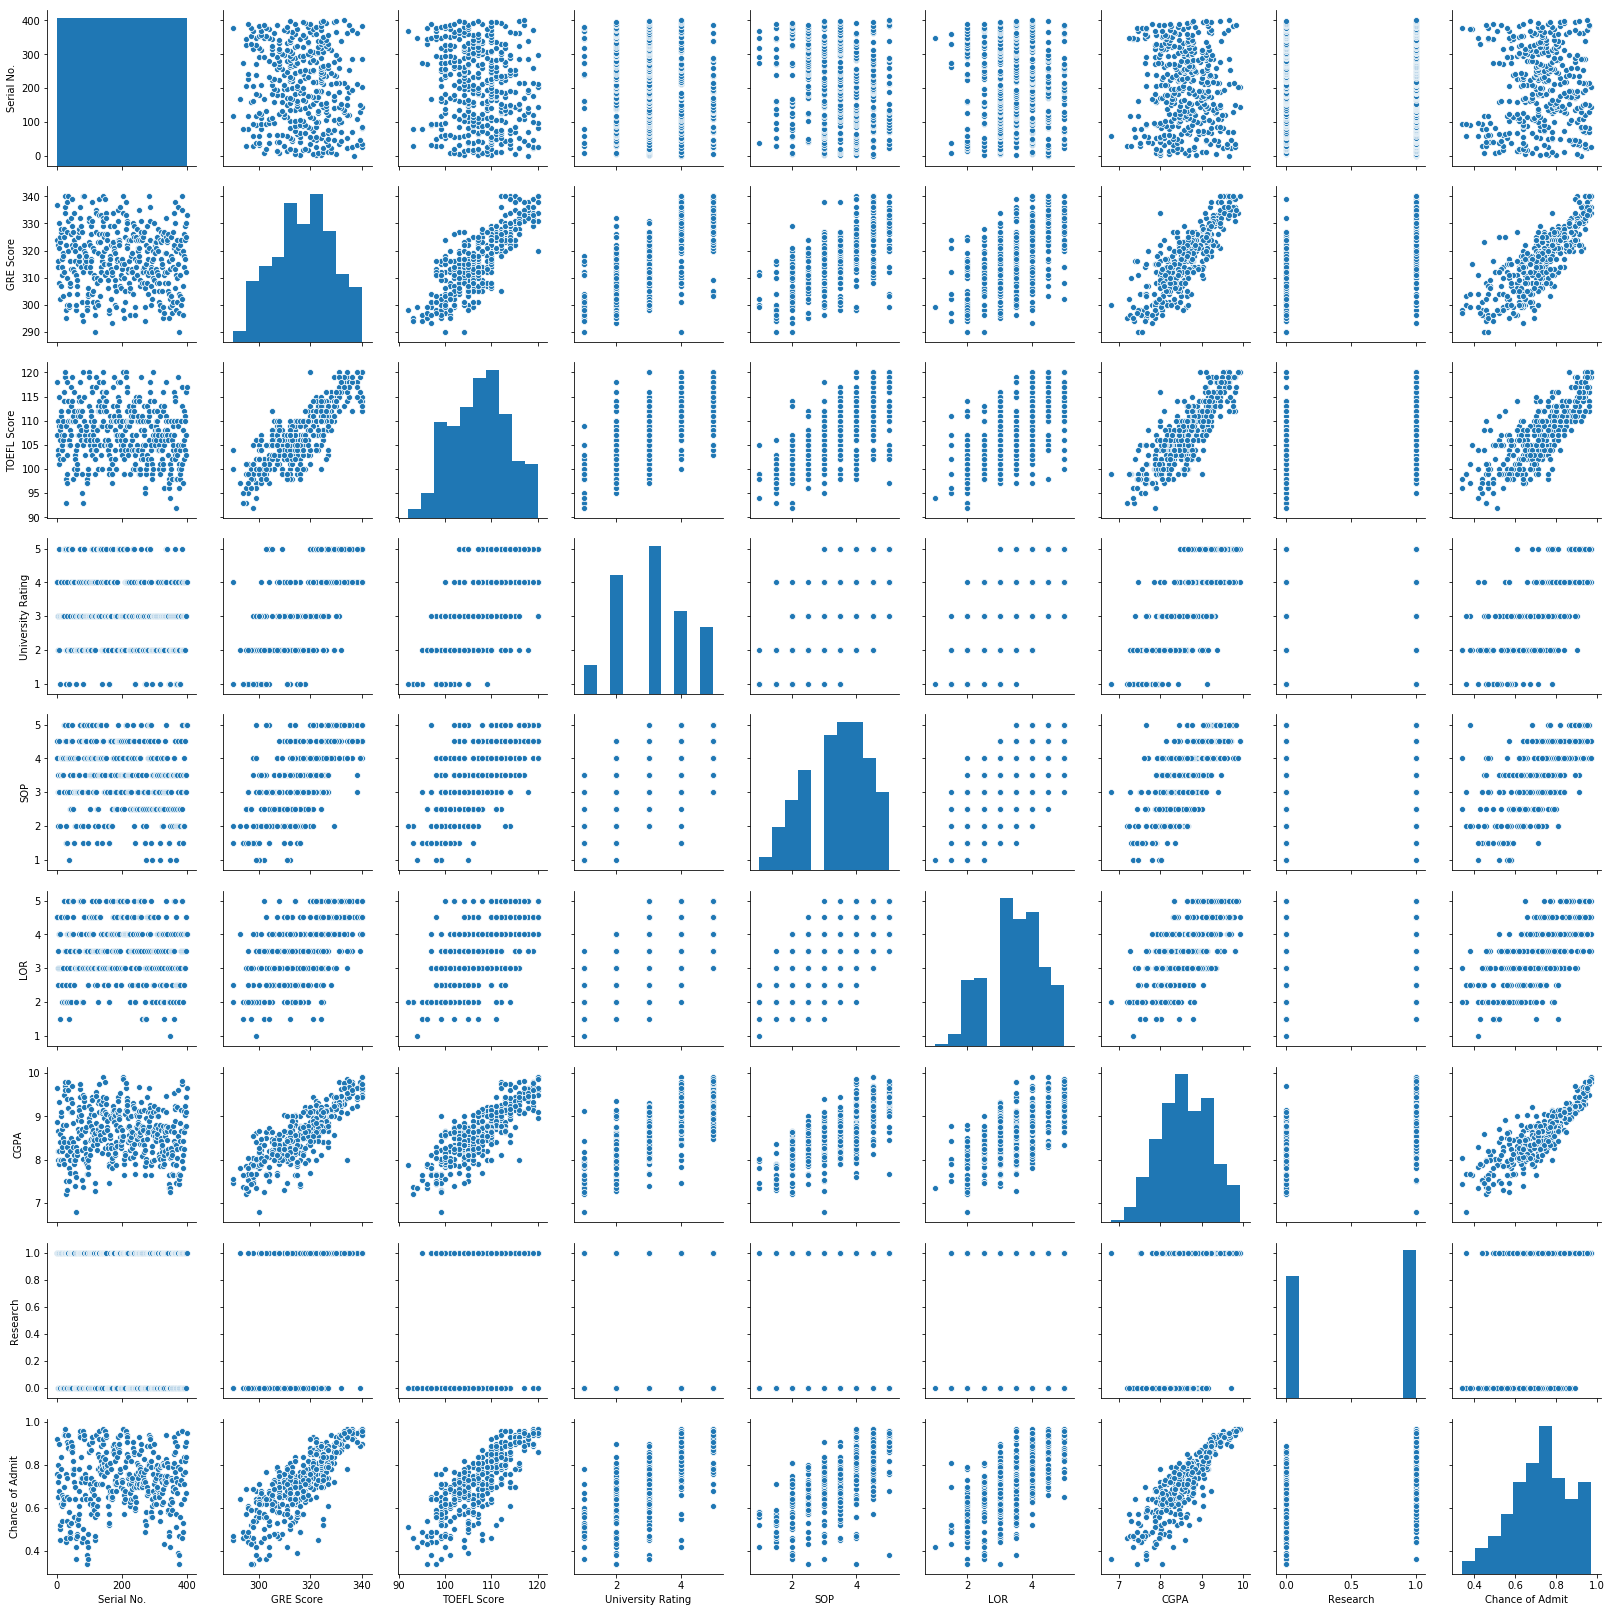

In [455]:
#display pairwise correlation between variables
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(gradData.corr(), ax=ax, annot=True, linewidths=0.5,fmt= '.2g', cmap="PiYG")
plt.show()
sns.pairplot(gradData)

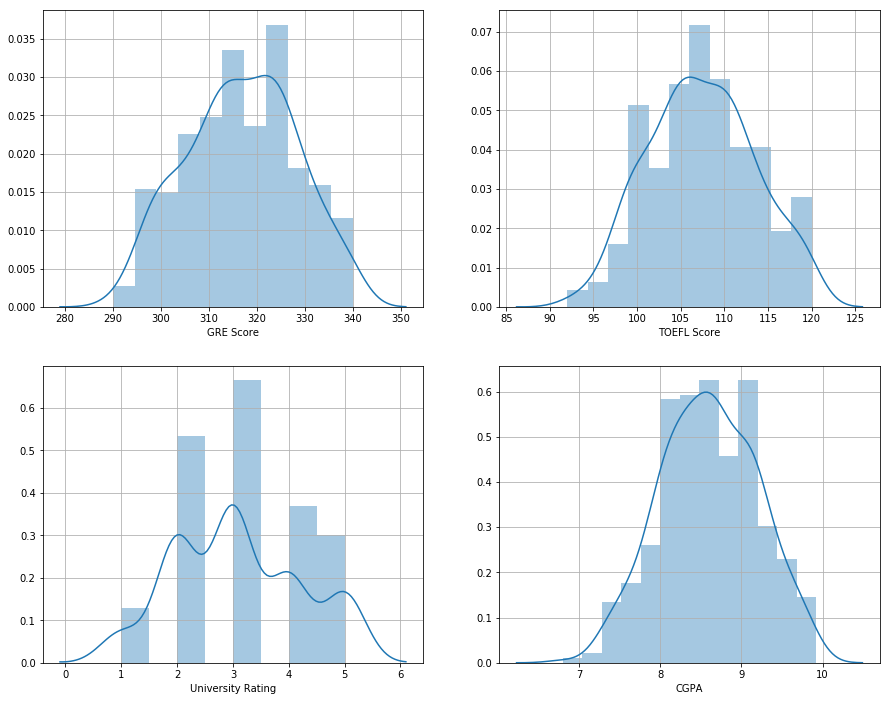

In [456]:
#plot variables with high correlation KDE values
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.distplot(gradData['GRE Score'])
plt.grid()

plt.subplot(2,2,2)
sns.distplot(gradData['TOEFL Score'])
plt.grid()

plt.subplot(2,2,3)
sns.distplot(gradData['University Rating'])
plt.grid()

plt.subplot(2,2,4)
sns.distplot(gradData['CGPA'])
plt.grid()

In [457]:
#Analysis of students that have research experience
#calculate number of tudents with/without research
studentsWithResearch=((gradData['Research']==1).sum())
studentsWOResearch=((gradData['Research']==0).sum())
studResPerc=(studentsWithResearch/len(gradData))*100

#print to user
print("Total number of students with Research : ",(studentsWithResearch))
print("Total number of students with-out Research : ",(studentsWOResearch))
print("Percentage of students with Research : ",(studResPerc))

Total number of students with Research :  219
Total number of students with-out Research :  181
Percentage of students with Research :  54.75


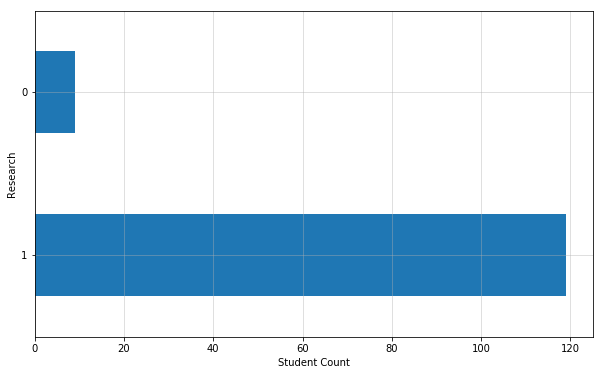

1    119
0      9
Name: Research, dtype: int64


In [458]:
#Research influence on Chance of Admission
#Students with reaseach and higher than 80% chance of admission
researchHCA=gradData[gradData["Chance of Admit"]>=0.8]["Research"].value_counts()
plt.figure(figsize=(10,6))
researchHCA.plot(kind='barh')
plt.grid(alpha=0.5)
plt.xlabel('Student Count')
plt.ylabel('Research')
plt.show()
print(researchHCA)

From given University Rating and Student count in each university, number of Students having chance >80% of Admit:
University Rating 1 :  0
University Rating 2 :  6
University Rating 3 :  21
University Rating 4 :  49
University Rating 5 :  52


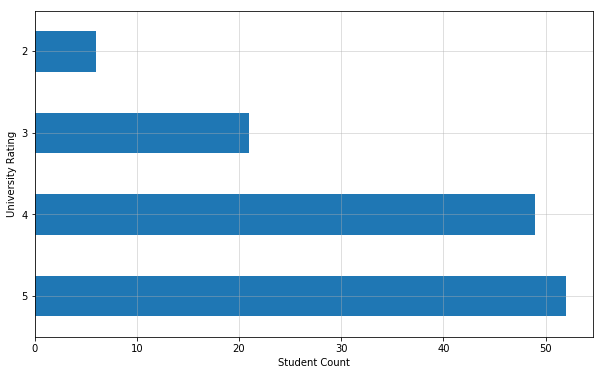

In [460]:
#University ratings for students with higher than 80% admission

print('From given University Rating and Student count in each university, number of Students having chance >80% of Admit:')
print('University Rating 1 : ',0)
print('University Rating 2 : ',UN_HCA.iloc[3])
print('University Rating 3 : ',UN_HCA.iloc[2])
print('University Rating 4 : ',UN_HCA.iloc[1])
print('University Rating 5 : ',UN_HCA.iloc[0])

plt.figure(figsize=(10,6))
UN_HCA= gradData[gradData["Chance of Admit"] >= 0.8]["University Rating"].value_counts()
UN_HCA.plot(kind='barh')
plt.grid(alpha=0.5)
plt.xlabel('Student Count')
plt.ylabel('University Rating')
plt.show()



In [461]:
#max,average,and std for GRE,TOEFL and CGPA

gre_avg = gradData['GRE Score'].mean()
gre_std = gradData['GRE Score'].std()
print("Maximum GRE Score : 340")
print("Average GRE Score : ",gre_avg)
print("Standard Deaviation : ",gre_std)

diff = gradData['GRE Score']-gre_avg
gradData['SD_GRE'] = diff/gre_std

toefl_avg = gradData['TOEFL Score'].mean()
toefl_std = gradData['TOEFL Score'].std()
print("Maximum TOEFL Score : 120")
print("Average TOEFL Score : ",toefl_avg)
print("Standard Deviation : ",toefl_std)

diff = gradData['TOEFL Score']-toefl_avg
gradData['SD_TOEFL'] = diff/toefl_std

cgpa_avg = gradData['CGPA'].mean()
cgpa_std = gradData['CGPA'].std()
print("Maximum CGPA Score : 10")
print("Average CGPA Score : ",cgpa_avg)
print("Standard Deviation : ",cgpa_std)

diff = gradData['CGPA']-cgpa_avg
gradData['SD_CGPA'] = diff/cgpa_std

Maximum GRE Score : 340
Average GRE Score :  316.8075
Standard Deaviation :  11.473646113500477
Maximum TOEFL Score : 120
Average TOEFL Score :  107.41
Standard Deviation :  6.069513777374129
Maximum CGPA Score : 10
Average CGPA Score :  8.598924999999998
Standard Deviation :  0.5963170964964317


In [462]:
#verify new data columns
#STD of GRE, TOEFL, and CGPA are added to the dataframe to analysis
#print first 5 lines of data
gradData.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit    SD_GRE  SD_TOEFL   SD_CGPA  
0         1             0.92  1.759903  1.744786  1.762611  
1         1             0.76  0.626871 -0.067551  0.454582  
2         1             0.72 -0.070379 -0.561824 -1.004373  
3         1             0.80  0.452559  0.426723  0.119190  
4         0             0.65 -0.244691 -0.726582 -0.652212

High orrelation is seen these pairplots of chosen independent variables for the Chance of Admission


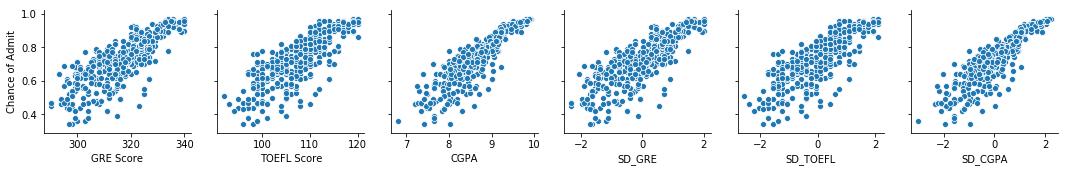

<Figure size 1152x576 with 0 Axes>

In [463]:
#plot variables with high coorelation to Chance of Admit
sns.pairplot(gradData, x_vars=['GRE Score','TOEFL Score','CGPA','SD_GRE','SD_TOEFL','SD_CGPA'], y_vars='Chance of Admit')
plt.figure(figsize=(16,8))
print("High orrelation is seen these pairplots of chosen independent variables for the Chance of Admission")

In [464]:
#seperate Chance of Admit from data set for classification
x = gradData.drop(['Chance of Admit',"Serial No."], axis=1)
y = gradData['Chance of Admit']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
SD_GRE               400 non-null float64
SD_TOEFL             400 non-null float64
SD_CGPA              400 non-null float64
dtypes: float64(6), int64(4)
memory usage: 31.3 KB


                   Co-efficient
GRE Score              0.001996
TOEFL Score            0.002844
University Rating      0.005019
SOP                    0.000679
LOR                    0.015976
CGPA                   0.029807
Research               0.022029
SD_GRE                 0.000174
SD_TOEFL               0.000469
SD_CGPA                0.049984


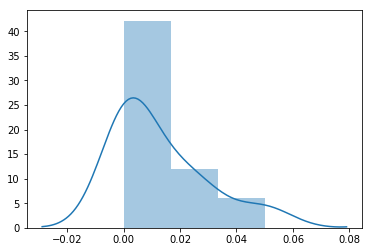

In [465]:
#split data set and calculate linear regression for independent variables
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
#linear regression calculation
lr = LinearRegression()
lr.fit(x_train, y_train)
#coefficient calculation
coef = pd.DataFrame(lr.coef_, x_test.columns, columns = ['Co-efficient'])
sns.distplot(coef)
print (coef)


Text(0.5, 0.98, 'Actual vs Predicted')

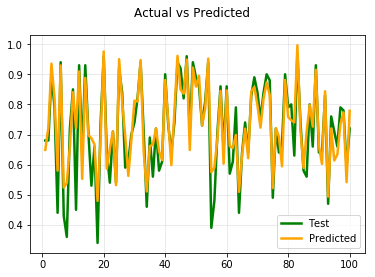

In [467]:
#calculate LR prediction with testing set
y_pred_mlr = lr.predict(x_test)
len(x_test)
#plot actual vs predicted values
fig = plt.figure()
c = [i for i in range(1,101,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,y_pred_mlr, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

Text(0.5, 0.98, 'Error Terms')

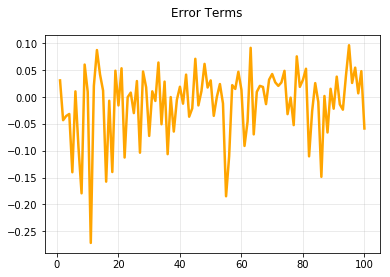

In [469]:
#calculate mse and R squared values for linear regression
mse = mean_squared_error(y_test, y_pred_mlr)
r_square_score = r2_score(y_test, y_pred_mlr)
fig = plt.figure()
plt.plot(c,y_test-y_pred_mlr, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms')

In [447]:
#classify data for students above and below 80% chance of admission
y_train_label = [1 if each > 0.8 else 0 for each in y_train]
y_test_label  = [1 if each > 0.8 else 0 for each in y_test]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score =  0.95
precision_score:  1.0
recall_score:  0.84375
f1_score:  0.9152542372881356


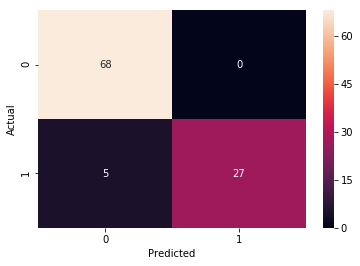

In [471]:
#SVM classification
svmmodel = SVC()
svmmodel.fit(x_train,y_train_label)
y_pred_svm = svmmodel.predict(x_test)
cm_svm = confusion_matrix(y_test_label, svmmodel.predict(x_test))
sns.heatmap(cm_svm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print("Accuracy Score = ",accuracy_score(y_test_label, y_pred_svm))
print("precision_score: ", precision_score(y_test_label,svmmodel.predict(x_test)))
print("recall_score: ", recall_score(y_test_label,svmmodel.predict(x_test)))
print("f1_score: ",f1_score(y_test_label,svmmodel.predict(x_test)))

In [472]:
#decision tree regression
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)
#print R squared value
print('R_Squared Score = ',r2_score(y_test, y_pred_dt))


R_Squared Score =  0.6605551340559404


In [473]:
math.sqrt(len(y_test_label))

10.0

In [478]:
#KNN classification
knnc = KNeighborsClassifier(n_neighbors = 11, p=2, metric = 'euclidean')
knnc.fit(x_train, y_train_label)
#knn prediction
y_pred_knn = knnc.predict(x_test)
y_pred_knn


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

Accuracy Score =  0.94
precision_score:  0.9642857142857143
recall_score:  0.84375
f1_score:  0.8999999999999999


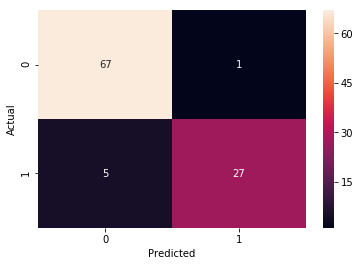

In [479]:
#display KNN classification
cm = confusion_matrix(y_test_label, y_pred_knn)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print("Accuracy Score = ",accuracy_score(y_test_label, y_pred_knn))
print("precision_score: ", precision_score(y_test_label,knnc.predict(x_test)))
print("recall_score: ", recall_score(y_test_label,knnc.predict(x_test)))
print("f1_score: ",f1_score(y_test_label,knnc.predict(x_test)))

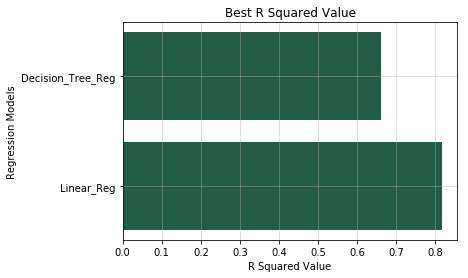

[0.81611478 0.66055513]


In [480]:
#compare regression models basedo R squared value
x=["Linear_Reg", "Decision_Tree_Reg"]
y=np.array([r2_score(y_test,y_pred_mlr),r2_score(y_test,y_pred_dt)])
plt.barh(x,y, color='#225b46')
plt.xlabel('R Squared Value')
plt.ylabel('Regression Models')
plt.title('Best R Squared Value')
plt.grid(alpha=0.5)
plt.show()
print (y)

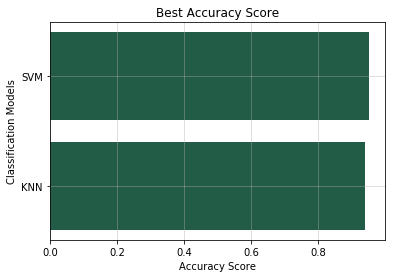

[0.94 0.95]


In [482]:
#compare classifications based on accuracy score
x = ["KNN","SVM"]
y = np.array([accuracy_score(y_test_label, y_pred_knn),accuracy_score(y_test_label, y_pred_svm)])
plt.barh(x,y, color='#225b46')
plt.xlabel("Accuracy Score")
plt.ylabel("Classification Models")
plt.title("Best Accuracy Score")
plt.grid(alpha=0.5)
plt.show()
print (y)